# Notebook 002 - Exploratory Data Analysis (EDA)

This notebook aims to perform an **Exploratory Data Analysis (EDA)** on the data contained in the `candidates_initial_data` table created in the initial_data_load notebook. The goal is to understand the structure, quality, and characteristics of the data, identify common issues (such as missing values, outliers, or inconsistencies), and define the necessary actions for data cleaning and transformation.

Initially, the workshop001 directory is added to the system path so the system can import the scripts package and use the db_connector script to establish the database connection.

In [1]:
import sys
import os
sys.path.append(os.path.abspath(".."))

The necessary libraries for the development of the notebook are imported.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scripts.db_connector import get_db_engine


The table is loaded from the database into a dataframe using pandas and a query.

In [3]:
conn = get_db_engine()

In [4]:
query = "SELECT * FROM candidates_initial_data;"
df = pd.read_sql(query, conn)

df

C:\Users\valen\AppData\Local\Temp\ipykernel_7236\2478002064.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


,first_name,last_name,email,application_date,country,yoe,seniority,technology,code_challenge_score,technical_interview_score
0,Bernadette,Langworth,leonard91@yahoo.com,2021-02-26,Norway,2,Intern,Data Engineer,3,3
1,Camryn,Reynolds,zelda56@hotmail.com,2021-09-09,Panama,10,Intern,Data Engineer,2,10
2,Larue,Spinka,okey_schultz41@gmail.com,2020-04-14,Belarus,4,Mid-Level,Client Success,10,9
3,Arch,Spinka,elvera_kulas@yahoo.com,2020-10-01,Eritrea,25,Trainee,QA Manual,7,1
4,Larue,Altenwerth,minnie.gislason@gmail.com,2020-05-20,Myanmar,13,Mid-Level,Social Media Community Management,9,7
...,...,...,...,...,...,...,...,...,...,...
49995,Bethany,Shields,rocky_mitchell@hotmail.com,2022-01-09,Dominican Republic,27,Trainee,Security,2,1
49996,Era,Swaniawski,dolores.roob@hotmail.com,2020-06-02,Morocco,21,Lead,Game Development,1,2
49997,Martin,Lakin,savanah.stracke@gmail.com,2018-12-15,Uganda,20,Trainee,System Administration,6,1
49998,Aliya,Abernathy,vivienne.fritsch@yahoo.com,2020-05-30,Czech Republic,20,Senior,Database Administration,0,0


#### Initial EDA

After loading the data into the Dataframe, the following validations are performed:  
- The size of the dataframe.  
- Information about each column in the dataframe (data type, entries and non-null values).  
- Statistical description of both numerical and categorical columns.  
- Presence of duplicate records in the dataframe.

In [5]:
df.shape

(50000, 10)

After validating the DataFrame information, two key aspects were identified:  

1. Absence of Null Values: No null values were found in any columns of the DataFrame.  
2. Incorrect Data Type in application_date: Although the application_date column contains dates, its current data type is object. To facilitate analysis, it needs to be converted to datetime.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   first_name                 50000 non-null  object
 1   last_name                  50000 non-null  object
 2   email                      50000 non-null  object
 3   application_date           50000 non-null  object
 4   country                    50000 non-null  object
 5   yoe                        50000 non-null  int64 
 6   seniority                  50000 non-null  object
 7   technology                 50000 non-null  object
 8   code_challenge_score       50000 non-null  int64 
 9   technical_interview_score  50000 non-null  int64 
dtypes: int64(3), object(7)
memory usage: 3.8+ MB


Statistical descriptions of the quantitative columns are validated. I mainly checked the number of records in each column and the minimum and maximum values in each column. 

In [7]:
df.describe()

,yoe,code_challenge_score,technical_interview_score
count,50000.000000,50000.000000,50000.000000
mean,15.286980,4.996400,5.003880
std,8.830652,3.166896,3.165082
min,0.000000,0.000000,0.000000
25%,8.000000,2.000000,2.000000
50%,15.000000,5.000000,5.000000
75%,23.000000,8.000000,8.000000
max,30.000000,10.000000,10.000000


Statistical descriptions of the qualitative columns are validated. I mainly checked the number of records in each column, their number of unique values and the most frequent values in each column.

In [8]:
df.describe(include='object')

,first_name,last_name,email,application_date,country,seniority,technology
count,50000,50000,50000,50000,50000,50000,50000
unique,3007,474,49833,1646,244,7,24
top,Sarai,Murazik,fern70@gmail.com,2020-07-07,Malawi,Intern,Game Development
freq,33,138,3,50,242,7255,3818


No duplicate records were found in the Dataframe.

In [10]:
print(df.duplicated().sum())

0


However, duplicates are validated in the email column to verify that there are no candidates that for one application have several records.

In [11]:
print(df["email"].duplicated().sum())


167


It is then validated that there are 167 duplicate emails so I decide to verify if there are duplicates by first_name, last_name, email and application_date to the selection process.

In [ ]:
num_duplicates = df.duplicated(subset=["first_name", "last_name", "email", "application_date"]).sum()
print(f"Total duplicated records: {num_duplicates}")

Total de registros duplicados: 0


No duplicates were found under this metric. This may mean that the repeated emails may be from candidates who applied to the selection process on several occasions and on different dates. This could be asserted with certainty if in the given context it is established that a candidate can apply several times to different selection processes in the company. For this reason it was decided not to eliminate this data as it may be relevant for future analysis.

#### Validating outliers

Based on the required visualizations and the columns of the dataset, the columns to validate are:

- Yoe (years of experience)

- Code Challenge Score

- Technical Interview Score

- Seniority

- Technology

For yoe, the values are validated by means of a histogram that shows the distribution of the data, which allows to verify the range of values in which the data are found. The interquartile range is also used to establish a “normal” range in which the data values should be found.

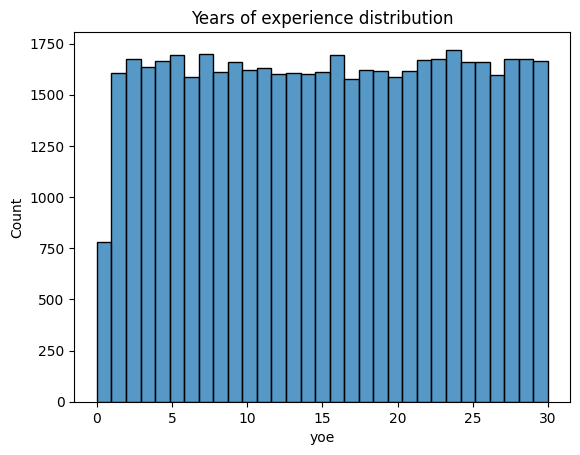

In [13]:
sns.histplot(
    df["yoe"],
    binwidth=0.96
)

plt.title("Years of experience distribution")
plt.show()

In [14]:
Q1 = df['yoe'].quantile(0.25)
Q3 = df['yoe'].quantile(0.75)
IQR = Q3 - Q1

umbral_inferior = Q1 - 1.5 * IQR
umbral_superior = Q3 + 1.5 * IQR
print(f"{umbral_inferior},{umbral_superior}")

-14.5,45.5


Taking into account the describe and histogram previously made in the code, we know that for the yoe column the minimum and maximum values are 0 and 30 respectively, so it is not necessary to delete any record since they are all within the defined range.

For code_challenge_score the values are validated by means of a histogram showing the distribution of the data. As the values are between 0 and 10 and it is in a usual score range then the data is kept as it is. However, to be on the safe side, the data is also validated by counting the repetitions of each value in the column.

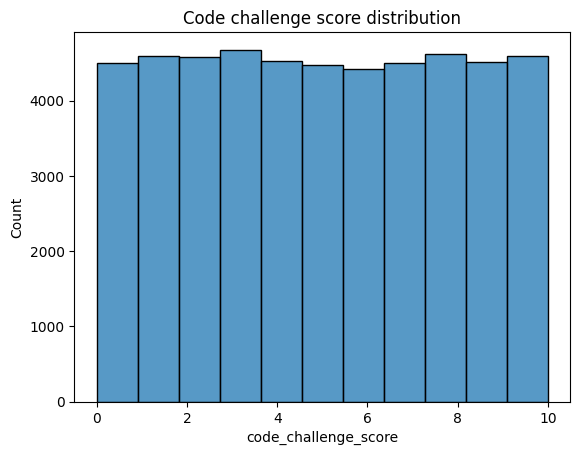

In [15]:
sns.histplot(
    df["code_challenge_score"],
    binwidth=0.9
)

plt.title("Code challenge score distribution")
plt.show()


In [16]:
print(df['code_challenge_score'].value_counts().sort_index())

code_challenge_score
0     4502
1     4590
2     4579
3     4678
4     4521
5     4479
6     4419
7     4506
8     4619
9     4519
10    4588
Name: count, dtype: int64


For technical_interview_score the values are validated by means of a histogram showing the distribution of the data. As the values are between 0 and 10 and it is in a usual rating range then the data is kept as is. However, to be on the safe side, the data is also validated by counting the repetitions of each value in the column.

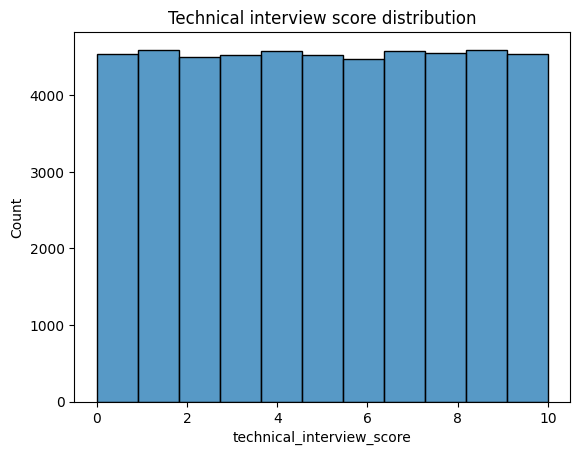

In [17]:
sns.histplot(
    df["technical_interview_score"],
    binwidth=0.9
)
plt.title("Technical interview score distribution")
plt.show()

In [18]:
print(df['technical_interview_score'].value_counts().sort_index())

technical_interview_score
0     4539
1     4588
2     4500
3     4528
4     4578
5     4527
6     4471
7     4578
8     4555
9     4597
10    4539
Name: count, dtype: int64


For the categorical columns the unique function is used to check the values in each column. The verification was done in this way since there are relatively few values in each column. No outliers were found so the records in the columns are kept as they are.

In [19]:
print(df['seniority'].unique())

['Intern' 'Mid-Level' 'Trainee' 'Junior' 'Lead' 'Architect' 'Senior']


In [20]:
print(df['technology'].unique())

['Data Engineer' 'Client Success' 'QA Manual'
 'Social Media Community Management' 'Adobe Experience Manager' 'Sales'
 'Mulesoft' 'DevOps' 'Development - CMS Backend' 'Salesforce'
 'System Administration' 'Security' 'Game Development'
 'Development - CMS Frontend' 'Security Compliance'
 'Development - Backend' 'Design'
 'Business Analytics / Project Management' 'Development - Frontend'
 'Development - FullStack' 'Business Intelligence'
 'Database Administration' 'QA Automation' 'Technical Writing']


#### Conclusions to perform transformations
- The data type of application_date should be changed from object to datetime.
- The values of the categorical columns will be standardized by changing them to lowercase letters.
- I´ll ad 2 columns: application_status and application_year. This to be able to do the visualizations easily.
- The columns first_name, last_name and email will be deleted because they are not relevant for the visualizations.